# Confusion Matrix

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
# Misalkan terdapat data aktual (y) & data hasil prediksi model (yp)
y = ['Yes', 'No', 'Yes', 'No', 'Yes', 'No']
yp = ['Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes']

<hr>

### 1. Create confusion matrix manually

- | __pred "Yes"__ | __pred "No"__
- | - | -
__aktual "Yes"__ | __*3*__ | __*0*__ 
__aktual "No"__ | __*2*__ | __*1*__

<hr>

### 2. Create confusion matrix using Sklearn

In [4]:
from sklearn.metrics import confusion_matrix

x = confusion_matrix(y, yp, labels=["Yes", 'No'])
df = pd.DataFrame(
    x, columns=['Pred YES', 'Pred NO'], index=['Actual YES', 'Actual NO'])
df

,Pred YES,Pred NO
Actual YES,3,0
Actual NO,2,1


<hr>

### 3. True/False & Positif/Negatif (Binary Classification)

Untuk kasus binary classification (model yang memprediksi 0/1 aka True/False), dari confusion matrix dapat diambil beberapa parameter yang dapat digunakan untuk menghitung evaluation metrics binary classification, di antaranya sebagai berikut:

- __True Positives (TP)__: Prediksi YES, Aktual YES.
- __True Negatives (TN)__: Prediksi NO, Aktual NO.
- __False Positives (FP)__: Prediksi YES, Aktual NO.
- __False Negatives (FN)__: Prediksi NO, Aktual YES.


- | __pred "Yes"__ | __pred "No"__
- | - | -
__aktual "Yes"__ | __*TP = 3*__ | __*FN = 0*__ 
__aktual "No"__ | __*FP = 2*__ | __*TN = 1*__


In [5]:
# show TN, FP, FN, TP from confusion matrix 
tn, fp, fn, tp = confusion_matrix(y, yp).ravel()
tn, fp, fn, tp

(1, 2, 0, 3)

<hr>

### 4. Plot Confusion Matrix

In [6]:
from sklearn.linear_model import LogisticRegression

x = np.arange(1, 11)
y = np.array([0,0,0,0,1,0,1,0,1,1,])

model = LogisticRegression(solver='liblinear')
model.fit(x.reshape(-1, 1), y)

yPred = model.predict(x.reshape(-1, 1))
yPred

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [7]:
confusion_matrix(y, yPred, labels=[0,1])

array([[4, 2],
       [1, 3]], dtype=int64)

In [8]:
df = pd.DataFrame(
    confusion_matrix(y, yPred, labels=[0,1]), columns=['Pred 0', 'Pred 1'], index=['Actual 0', 'Actual 1'])
df

,Pred 0,Pred 1
Actual 0,4,2
Actual 1,1,3


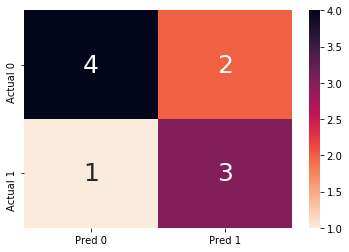

In [10]:
# plot confusion matrix dengan seaborn heatmap
sb.heatmap(
    df, annot=True, annot_kws={"size": 25}, cmap = sb.cm.rocket_r
)

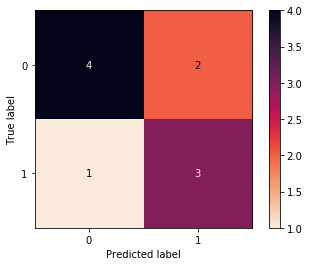

In [14]:
# plot confusion matrix dg plot_confusion_matrix (matplotlib based)
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(
    model, x.reshape(-1, 1), y, cmap='rocket_r'
)

<hr>

### 5. Confusion Matrix (non-Binary Classification)

Confusion matrics untuk model yag mengklasifikasikan >2 kategori

In [30]:
y_true = ["Bebek", "Ayam", "Bebek", "Bebek", "Ayam", "Angsa"]
y_pred = ["Ayam", "Ayam", "Bebek", "Bebek", "Ayam", "Bebek"]
confusion_matrix(y_true, y_pred)

array([[0, 0, 1],
       [0, 2, 0],
       [0, 1, 2]], dtype=int64)

In [33]:
df = pd.DataFrame(
    confusion_matrix(y_true, y_pred, labels=["Angsa", "Ayam", "Bebek"]), 
    columns=['Pred Angsa', 'Pred Ayam', 'Pred Bebek'], 
    index=['Actual Angsa', 'Actual Ayam', 'Actual Bebek']
)
df

,Pred Angsa,Pred Ayam,Pred Bebek
Actual Angsa,0,0,1
Actual Ayam,0,2,0
Actual Bebek,0,1,2


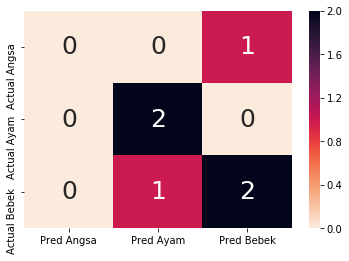

In [34]:
sb.heatmap(
    df, annot=True, annot_kws={"size": 25}, cmap = sb.cm.rocket_r
)